In [1]:
# IMPORT STATEMENTS
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path = ["/booleanfs2/sahoo/BoNE/"] + sys.path

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3
        
import SMaRT.MacUtils as mut
reload(mut)

<module 'SMaRT.MacUtils' from '/booleanfs2/sahoo/BoNE/SMaRT/MacUtils.py'>

In [2]:
import pandas as pd
import numpy as np
import bone
reload(bone)
import Datasets
reload(Datasets)
import Datasets_icam
reload(Datasets_icam)
hu = bone.hu
re = bone.re
import Datasets_icam as ds

# Figure 2B

Small Intestine Adult version_2 [Final] (n = 10)
PMID: http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=T9_1
10 [7, 3] PMID: http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=T9_1 T9_1
[947, 1322]
Large intestine ADULT s_a1_a2_v1 [Final] (n = 8)
GSE158328 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=T12_22
8 [4, 4] GSE158328 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=T12_22 T12_22
[869, 643]
ST Fetal v2-precise-top [Final] (n = 11)
GSE158328 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=T12_6
11 [5, 6] GSE158328 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=T12_6 T12_6
[257, 53]
Small Intestine Adult version_2 [Final] (n = 10)
PMID: http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=T9_1
10 [7, 3] PMID: http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=T9_1 T9_1
[47, 112, 120]
Large intestine ADULT s_a1_a2_v1 [Final] (n = 8)
GSE158328 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=T12_22
8 [4, 4] GSE158328 htt

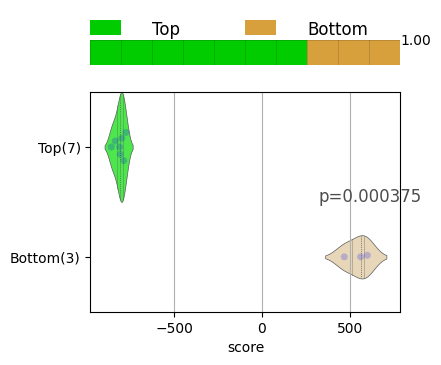

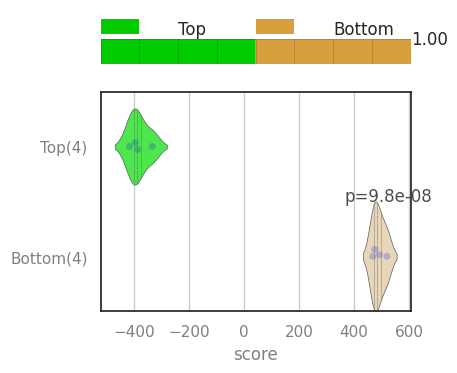

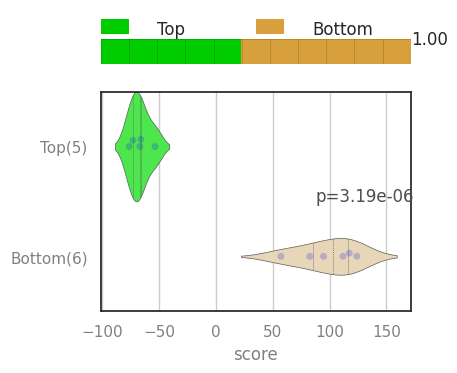

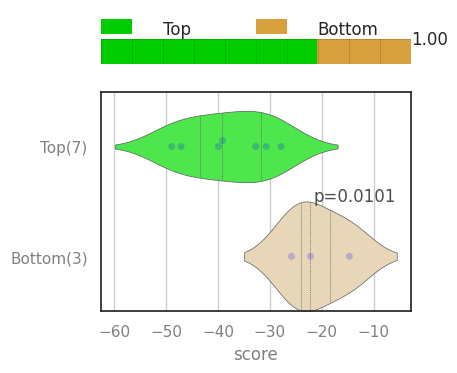

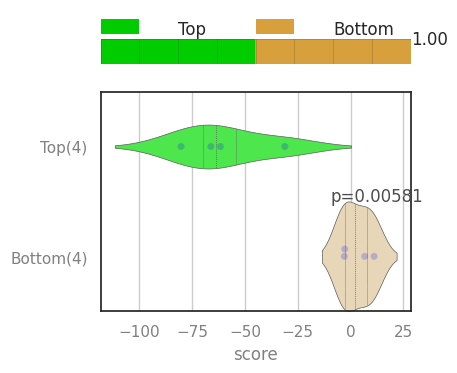

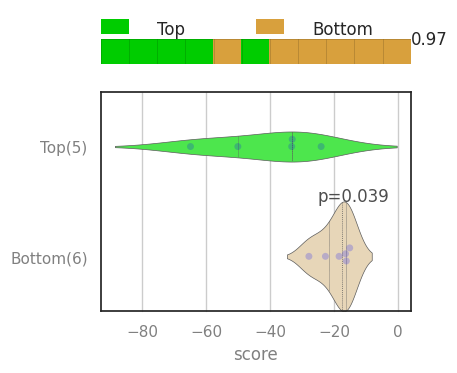

In [6]:
wt1, l1 = ds.getAdultDegLudvig2022() # Adult DEGs PMID: 34845373
ana = bone.IBDAnalysis()
ana.getAdultLudvig2022() # Adult PMID: 34845373
fig = bone.processData(ana, l1, wt1, desc=None, violin=1)
# strname = str(ana.name)
# fig.savefig(f'{strname}.pdf', dpi=100, transparent=True,bbox_inches = 'tight')

wt1, l1 = ds.getAdultDegCorbett2021() # Adult DEGs GSE158328
ana = bone.IBDAnalysis()
ana.getAdultCorbett2021() # GSE158328 adult - slide A1 and A2
fig = bone.processData(ana, l1, wt1, desc=None, violin=1)
# strname = str(ana.name)
# fig.savefig(f'{strname}.pdf', dpi=100, transparent=True,bbox_inches = 'tight')

wt1, l1 = ds.getFetalDegCorbett2021() # Fetal DEGs GSE158328
ana = bone.IBDAnalysis()
ana.getFetalCorbett2021() # GSE158328 fetal - slide A4 and A6
fig = bone.processData(ana, l1, wt1, desc=None, violin=1)
# strname = str(ana.name)
# fig.savefig(f'{strname}.pdf', dpi=100, transparent=True,bbox_inches = 'tight')

wt1, l1 = mut.getCls13a14a3() # SMaRT
ana = bone.IBDAnalysis()
ana.getAdultLudvig2022() # Adult PMID: 34845373
fig = bone.processData(ana, l1, wt1, desc=None, violin=1)
# strname = str(ana.name)
# fig.savefig(f'{strname}.pdf', dpi=100, transparent=True,bbox_inches = 'tight')

wt1, l1 = mut.getCls13a14a3() # SMaRT
ana = bone.IBDAnalysis()
ana.getAdultCorbett2021() # GSE158328 adult - slide A1 and A2
fig = bone.processData(ana, l1, wt1, desc=None, violin=1)
# strname = str(ana.name)
# fig.savefig(f'{strname}.pdf', dpi=100, transparent=True,bbox_inches = 'tight')

wt1, l1 = mut.getCls13a14a3() # SMaRT
ana = bone.IBDAnalysis()
ana.getFetalCorbett2021() # GSE158328 fetal - slide A4 and A6
fig = bone.processData(ana, l1, wt1, desc=None, violin=1)
# strname = str(ana.name)
# fig.savefig(f'{strname}.pdf', dpi=100, transparent=True,bbox_inches = 'tight')

# Figure 2C

In [85]:
def DEGComparison2(ana, desc=''):
    def getL(l1):
        return '(' + ",".join([str(len(k)) for k in l1]) +')'

    res = []
    wt1, l1 = ds.getAdultDegLudvig2022()
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','AdultDegLudvig2022', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    wt1, l1 = ds.getAdultDegCorbett2021()
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','AdultDegCorbett2021', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    wt1, l1 = ds.getFetalDegCorbett2021()
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','FetalDegCorbett2021', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    wt1, l1 = mut.getCls13a14a3()
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','SMaRT', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    cols = ['GSEID', 'ROC-AUC', 'pvalue', '#Cont', '#Expt',
            'Series', 'Species', 'Signature', '#Genes']
    df = pd.DataFrame(res, columns=cols)
    df['Condition'] = desc
    return df

def DEGComparisonmm(ana, desc=''):
    def getL(l1):
        return '(' + ",".join([str(len(k)) for k in l1]) +')'

    res = []
    '''import inspect
    print(inspect.getsource(ana.getStats))'''
    wt1, l1 = ds.getAdultDegLudvig2022()
    l1 = mut.getGroupsMm(l1)
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','AdultDegLudvig2022', getL(l1)]
#     ann = [re.sub(" .*", "", ana.h.getSource()),'','AdultDegLudvig2022', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]

    wt1, l1 = ds.getAdultDegCorbett2021()
    l1 = mut.getGroupsMm(l1)
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','AdultDegCorbett2021', getL(l1)]
#     ann = [re.sub(" .*", "", ana.h.getSource()),'','AdultDegCorbett2021', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    wt1, l1 = ds.getFetalDegCorbett2021()
    l1 = mut.getGroupsMm(l1)
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','FetalDegCorbett2021', getL(l1)]
#     ann = [re.sub(" .*", "", ana.h.getSource()),'','FetalDegCorbett2021', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    wt1, l1 = mut.getCls13a14a3()
    l1 = mut.getGroupsMm(l1)
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','SMaRT', getL(l1)]
#     ann = [re.sub(" .*", "", ana.h.getSource()),'','SMaRT', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    cols = ['GSEID', 'ROC-AUC', 'pvalue', '#Cont', '#Expt',
            'Series', 'Species', 'Signature', '#Genes']
    df = pd.DataFrame(res, columns=cols)
    df['Condition'] = desc
    print("mm")
    return df

res = []

ana.getJung2011(2)
desc = ana.atypes[0] + ' vs ' + ana.atypes[1]
res += [DEGComparison2(ana,desc=desc)]

ana.getJung2015(2)
desc = ana.atypes[0] + ' vs ' + ana.atypes[1]
res += [DEGComparison2(ana,desc=desc)]

ana.getMerlosSuarez2011(2)
desc = ana.atypes[0] + ' vs ' + ana.atypes[1]
res += [DEGComparisonmm(ana,desc=desc)]

ana.getQu2016(2)
desc = ana.atypes[0] + ' vs ' + ana.atypes[1]
res += [DEGComparison2(ana,desc=desc)]

ana.getTan2019(2)
desc = ana.atypes[0] + ' vs ' + ana.atypes[1]
res += [DEGComparisonmm(ana,desc=desc)]

ana.getTan2019(3)
desc = ana.atypes[0] + ' vs ' + ana.atypes[1]
res += [DEGComparisonmm(ana,desc=desc)]

ana.getHong2018(3)
desc = ana.atypes[0] + ' vs ' + ana.atypes[1]
res += [DEGComparison2(ana,desc=desc)]

ana.getScott2022(2)
desc = ana.atypes[0] + ' vs ' + ana.atypes[1]
res += [DEGComparison2(ana,desc=desc)]

ana.getWang2019(1) 
desc = ana.atypes[0] + ' vs ' + ana.atypes[1]
res += [DEGComparison2(ana,desc=desc)]

ana.getHaber2017LCS(1) 
desc = ana.atypes[0] + ' vs ' + ana.atypes[1]
res += [DEGComparisonmm(ana,desc=desc)]

ana.getHaber2017OR(1)
desc = ana.atypes[0] + ' vs ' + ana.atypes[1]
res += [DEGComparisonmm(ana,desc=desc)]

ana.getHaber2017R(1) 
desc = ana.atypes[0] + ' vs ' + ana.atypes[1]
res += [DEGComparisonmm(ana,desc=desc)]

ana.getHaber2017SalmHelm(1)
desc = ana.atypes[0] + ' vs ' + ana.atypes[1]
res += [DEGComparisonmm(ana,desc=desc)]

ana.getHaber2017SalmonellaInfect(1)
desc = ana.atypes[0] + ' vs ' + ana.atypes[1]
res += [DEGComparisonmm(ana,desc=desc)]
    
df = pd.concat(res)
df.to_csv("plots/DEG-validation-results-2.txt", sep="\t")

Jung 2011 Human ISC (n = 11)
GSE31255 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC110
11 [5, 6] GSE31255 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC110 CRC110
[2004, 3278]
[1846, 1490]
[481, 118]
[106, 361, 351]
Jung 2015 SC (n = 8)
GSE68340 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=ORG7
8 [4, 4] GSE68340 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=ORG7 ORG7
[2341, 3598]
[2123, 1600]
[571, 118]
[146, 394, 429]
Merlos Suarez 2011 Mouse ISC (n = 8)
GSE27605 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC109
8 [5, 3] GSE27605 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC109 CRC109
[1704, 2719]
[1541, 1314]
[364, 125]
[107, 259, 280]
mm
Qu 2016 Normal Adenoma Cancer (n = 58)
GSE77953 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP50
13 [6, 7] GSE77953 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP50 PLP50
[1106, 2060]
[1081, 766]
[274, 52]
[84, 255, 255]
Tan 2019 Stem and differentiated 

In [86]:
import cv2
import re
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.patches as patches
import matplotlib.colors as colors
import PIL
import math
get_ipython().magic('matplotlib inline')
import pandas as pd
import seaborn as sns
import json
from scipy.stats import fisher_exact, ttest_ind
from collections import Counter
from pprint import pprint
import os
import pickle
import sys
import plotnine as p9
#sys.path.append("/Users/dtv004/Daniella/data/BoNE")
#sys.path.append("BoNE")
#sys.path.append('/Users/dtv004/Daniella/data/BE/BoNE')
sys.path.append("/booleanfs/sahoo/scripts/")
sys.path.append("/booleanfs2/sahoo/Hegemon/")
import StepMiner as smn
import HegemonUtil as hu
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3     

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# import gc_mod
# reload(gc_mod)
import bone
reload(bone)

<module 'bone' from '/booleanfs2/sahoo/BoNE/bone.py'>

In [87]:
def DP1(dfs): # VERTICAL

    if len(dfs) <= 0:
        return None
    df1 = dfs[0]
    df1['Name'] = list(df1['Signature'])
    df1['Xl'] = list(df1['#Genes'])
    labels = [k['GSEID'][0] + ' ' + k['Condition'][0] for k in dfs]
    n1 = df1.shape[0]
    rocauc = list(df1['ROC-AUC'])
    p = list(df1['pvalue'])
    y = [1] * n1
    for i in range(1, len(dfs)):
        rocauc += list(dfs[i]['ROC-AUC'])
        p += list(dfs[i]['pvalue'])
        y += [i+1] * n1
    df = pd.DataFrame()
    df['ROC-AUC'] = rocauc
    df['pvalue'] = p
    df['ROC-AUC'] = df['ROC-AUC'].apply(
               lambda x: max([float(k) for k in str(x).split(",")]))
    df['pvalue'] = df['pvalue'].apply(
               lambda x: min([float(k) for k in str(x).split(",")]))
    df['Y'] = y
    df['R'] = [(i - 0.5) if i !=200  else 200  for i in df['ROC-AUC']]      #df['ROC-AUC'] - 0.5
    df['Ra'] = [abs(i)+ 0.5  if i<1  else 0  for i in df['R'] ]     # abs(df['R']) + 0.5
    df['Ra1'] = [abs(i)+ 0.5  if i<1  else 0.51 if i==0 else 0.48  for i in df['R'] ]

    df['AUC'] = ['Up' if i > 0 else 'Down' for i in df['R']]
    #['Up' if i > 0 else 'Down' if i!=0 else 'NP' for i in df['R']]
    df['code'] = [bone.getCode(i) for i in df['pvalue']]
    df['ROC-AUC'] = df['Ra1']
    sns.set()
    sns.set_style("white")
    sns.set_style({'xtick.color':'.5', 'ytick.color':'.5', 'axes.labelcolor': '.5'})
    sns.set_context("notebook")
    sns.set_palette([bone.adj_light(c, 0.7, 1) for c in ['red', 'blue']])
    x = [i + 1 for i in range(n1)] * len(labels)
    y = df['Y']
    fig, ax = plt.subplots(figsize=(12, len(dfs)*0.7+1), dpi=100)
    ax = sns.scatterplot(x=x, y=y, size="ROC-AUC", hue='AUC',
                         sizes = (0, 100), size_norm = (0.49, 1),
                         hue_order = ['Up', 'Down'], ax=ax, data=df);
    roc = list(df['Ra'])
    code = list(df['code'])
    for line in range(n1):
        ax.text(line + 1, len(labels) + .5, df1['Xl'][line],
                horizontalalignment='center', size='small', color='0.8',
                verticalalignment='bottom', rotation=90)
        for i in range(len(labels)):
            ax.text(line + 1, i + 0.9, "%.2f" % roc[line + n1 * i],
                    horizontalalignment='right', size='small', color='0.8',
                    verticalalignment='top',  rotation=90)
            ax.text(line + 1.5, i + 0.9, code[line + n1 * i],
                     horizontalalignment='right', size='small', color='0.8',
                     verticalalignment='top',  rotation=90)

    x1 = [i + 1 for i in range(n1)]
    ax.set_yticks(range(1, len(labels) + 1))
    ax.set_yticklabels(labels)
    ax.set_xlim([0, len(x1)+1])
    ax.set_ylim([0, len(labels) + 2])
    ax.set_xticks(x1)
    ax.set_xticklabels(df1['Name'], rotation=90)
    ax.set_ylabel("")
    ax.grid(False)
    handles, labels = ax.get_legend_handles_labels()
#     labels[4] = '0.5'
    ax.legend(handles, labels, bbox_to_anchor=(1.3, 1))

    return df,ax,fig

Condition  NS vs NC  Top vs Bottom    Avg                 Name
0               1.0           0.98  0.990   AdultDegLudvig2022
3               1.0           0.93  0.965                SMaRT
1               1.0           0.76  0.880  AdultDegCorbett2021
2               1.0           0.36  0.680  FetalDegCorbett2021


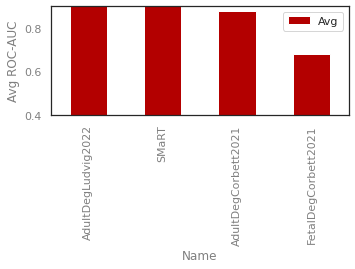

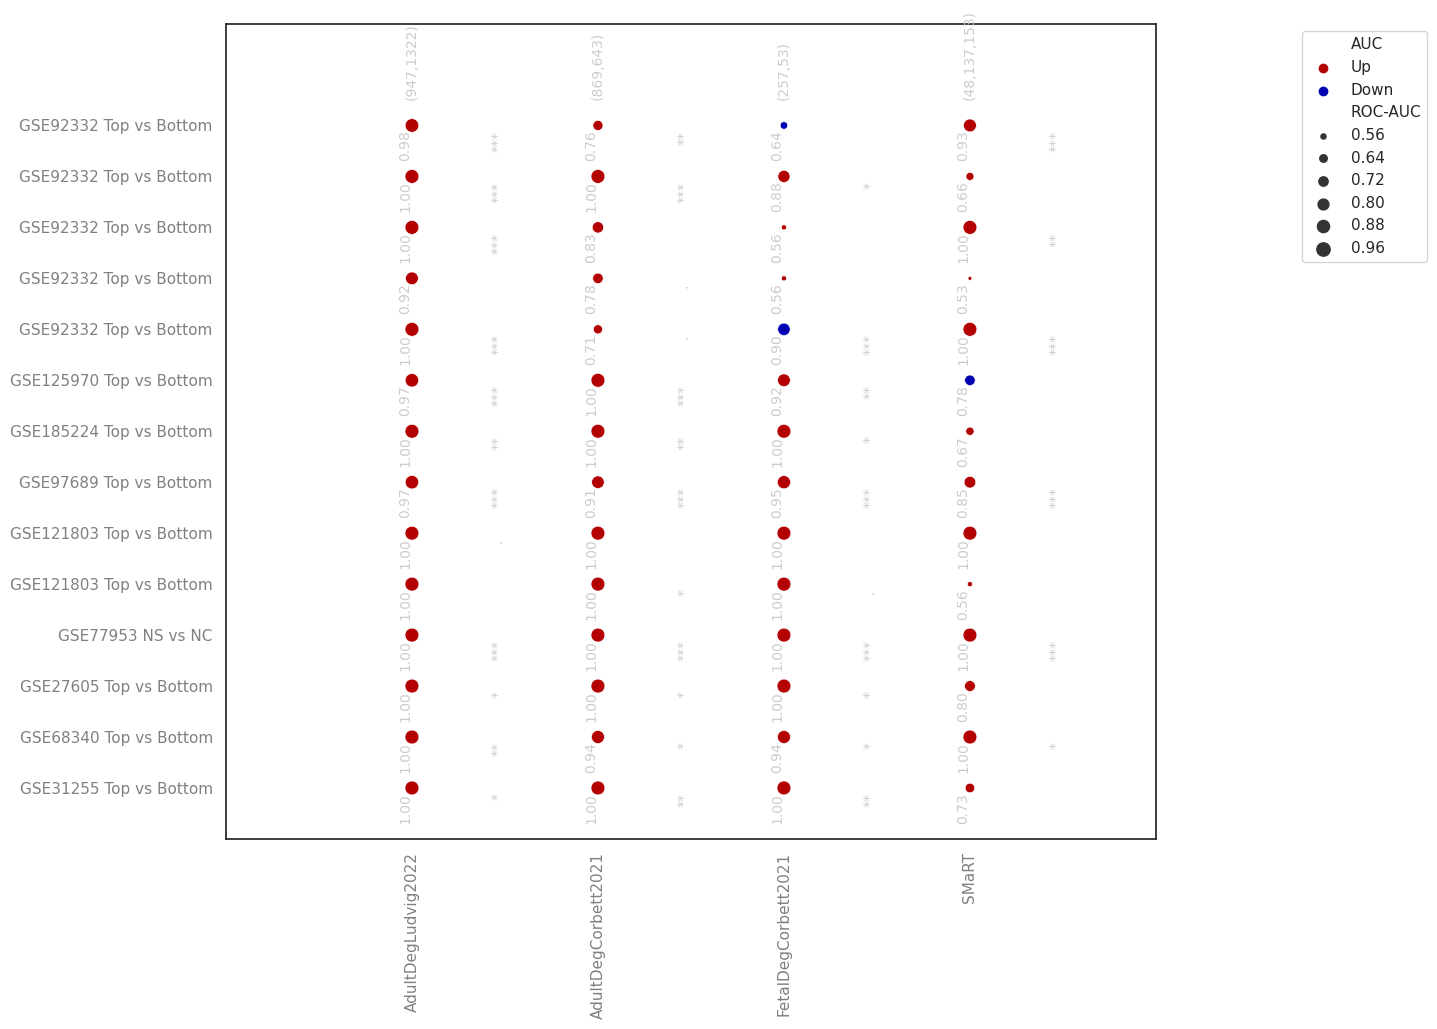

In [88]:
nsig = 4 # CHANGE to match # of sigs 

df = pd.read_csv("plots/DEG-validation-results-2.txt", sep="\t", index_col=0)
res = np.array_split(df, df.shape[0]/nsig, axis=0)

df1 = df.pivot_table(values='ROC-AUC', index=df.index, columns='Condition', aggfunc='last')
df1['Avg'] = df1.apply(pd.to_numeric).mean(axis=1)
df1['Name'] = [df.iloc[k, df.columns.get_loc("Signature")] for k in df1.index]
df1 = df1.sort_values('Avg', ascending=False)
ax = df1.plot.bar(x='Name', y='Avg', figsize=(2*24/9, 2))
ax.set_ylim([0.4, 0.9])
ax.set_ylabel("Avg ROC-AUC")
print(df1)
# pdf = getPDF("plots/validation-results.pdf")
# strname = "dot_plots_avg_roc-auc"

# plt.savefig(f'mac_{strname}.pdf', dpi=100, bbox_inches = 'tight')
# pdf.savefig(transparent=True,bbox_inches = 'tight')
# pdf = gc_mod.getPDF("plots/validation-results.pdf")
df,ax,fig = DP1(res)
# pdf.savefig(transparent=True,bbox_inches = 'tight')
# gc_mod.closePDF(pdf)
strname = "dot_plots"
# fig.savefig(f'{strname}.pdf', dpi=100, transparent=True,bbox_inches = 'tight')